<a href="https://colab.research.google.com/github/2022M3T1/Projeto4/blob/main/notebooks/modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas e autenticação

In [ ]:
!pip install -U -q PyDrive

In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelBinarizer
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id': '1-EL5jV5m_7zJi-rKgDXMAcCSrTGkq7z2'})
downloaded.GetContentFile('not_client.csv')
downloaded = drive.CreateFile({'id': '1-C4iOW6z7oAtWCHhwuC-IeTxp8COwbxj'})
downloaded.GetContentFile('client.csv')

In [ ]:
not_client = pd.read_csv('not_client.csv')
client = pd.read_csv('client.csv')

#Modelos Novo cliente











##Treinamento Teste

In [ ]:
from sklearn.model_selection import train_test_split

cols = ['vlr_score','vlr_credito', 'num_atend_atrs', 'qtd_restr']

# Dividindo x e y
x = not_client[cols]
y = not_client['ind_novo_cli']

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

##KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn_n = KNeighborsClassifier(n_neighbors=3)
kn_n.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = kn_n.predict(x_test)
y_pred_knn

array([1., 0., 0., ..., 0., 0., 0.])

###Metricas

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_knn)

0.9990431160643927

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_knn)

0.9967266775777414

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_knn)

0.9997947876051714

###Matriz de confusão

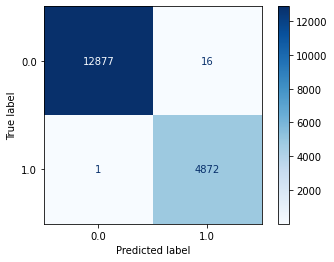

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(kn_n,x_test,y_test, cmap='Blues')

##Árvore de decisão

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

avd = DecisionTreeClassifier(criterion='entropy', random_state=42)
avd.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred_avd = avd.predict(x_test)
y_pred_avd

array([1., 0., 0., ..., 0., 0., 0.])

###Métricas

Acurácia

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_avd)

1.0

Precisão

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_avd)

1.0

Recall

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_avd)

1.0

###Matriz de confusão

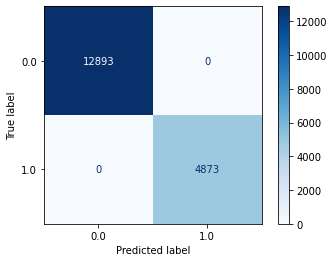

In [ ]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

rdf = RandomForestClassifier()
rdf.fit(x_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred_rdf = rdf.predict(x_test)

###Métricas

Acurácia

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rdf)

1.0

Precisão

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rdf)

1.0

Recall

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rdf)

1.0

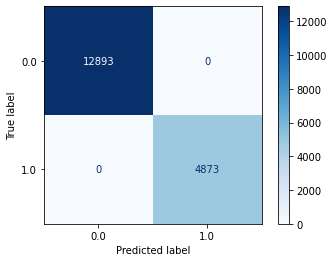

In [ ]:
plot_confusion_matrix(rdf,x_test,y_test, cmap='Blues')

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nbs = GaussianNB()
nbs.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred_nbs = rdf.predict(x_test)

###Métricas

Acurácia

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_nbs)

1.0

Precisão

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_nbs)

1.0

Recall

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_nbs)

1.0

###Matriz de confusão

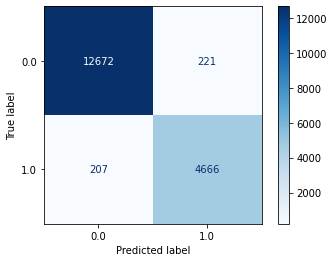

In [ ]:
plot_confusion_matrix(nbs,x_test,y_test, cmap='Blues')

##Regressão logística

In [ ]:
from sklearn.linear_model import LogisticRegression
rgl = LogisticRegression().fit(x_train, y_train)

In [ ]:
y_pred_rgl = rgl.predict(x_test)

###Métricas

Acuracia

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rgl)

0.8526398739164697

Presizão

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rgl)

0.7830780818478533

Recall

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rgl)

0.640057459470552

###Matriz de confusão

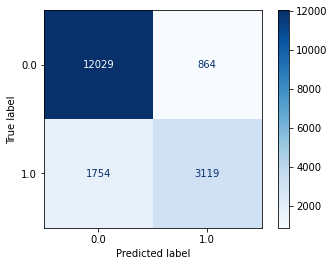

In [ ]:
plot_confusion_matrix(rgl,x_test,y_test, cmap='Blues')


#Modelos Atritado




##Treinamento Teste

In [ ]:
from sklearn.model_selection import train_test_split

cols = ['vlr_saldo','vlr_credito', 'num_atend_atrs', 'qtd_reclm']

# Dividindo x e y
x = client[cols]
y = client['ind_atrito']

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

##KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn_n = KNeighborsClassifier(n_neighbors=3)
kn_n.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = kn_n.predict(x_test)
y_pred_knn

array([0., 0., 0., ..., 0., 0., 0.])

###Metricas

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_knn)

0.9996948099743281

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_knn)

1.0

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_knn)

0.2916666666666667

###Matriz de confusão

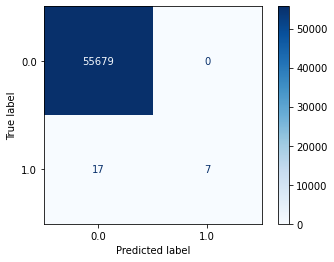

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(kn_n,x_test,y_test, cmap='Blues')

##Árvore de decisão

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

avd = DecisionTreeClassifier(criterion='entropy', random_state=42)
avd.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred_avd = avd.predict(x_test)
y_pred_avd

array([0., 0., 0., ..., 0., 0., 0.])

###Metricas

Acurácia

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_avd)

0.9992819058219485

Precisão

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_avd)

0.23333333333333334

Recall

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_avd)

0.2916666666666667

###Matriz de confusão

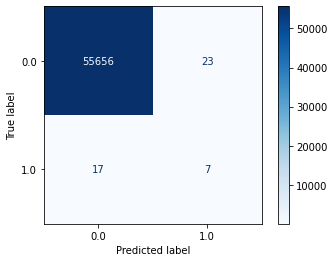

In [ ]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')

##SVM

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)
clf

SVC()

In [ ]:
y_pred_clf =clf.predict(x_test)

In [ ]:
y_pred_clf

array([0., 0., 0., ..., 0., 0., 0.])

### Métricas

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_clf)

0.9996768576198769

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_clf)

1.0

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_clf)

0.25

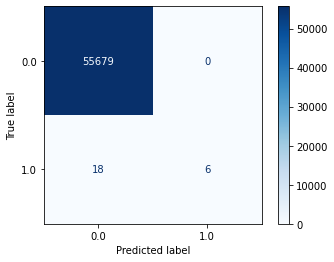

In [ ]:
plot_confusion_matrix(clf,x_test,y_test, cmap='Blues')

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

rdf = RandomForestClassifier()
rdf.fit(x_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred_rdf = rdf.predict(x_test)

###Métricas

Acuracia

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rdf)

0.9996948099743281

Precisão

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rdf)

1.0

Recall

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rdf)

0.2916666666666667

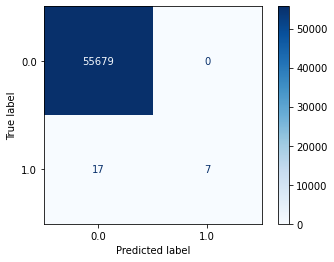

In [ ]:
plot_confusion_matrix(rdf,x_test,y_test, cmap='Blues')

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nbs = GaussianNB()
nbs.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred_nbs = rdf.predict(x_test)

###Métricas

Acuracia

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_nbs)

0.9996948099743281

Precisão

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_nbs)

1.0

Recall

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_nbs)

0.2916666666666667

###Matriz de confusão

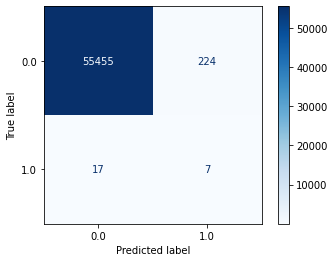

In [ ]:
plot_confusion_matrix(nbs,x_test,y_test, cmap='Blues')

##Regressão logística

In [ ]:
from sklearn.linear_model import LogisticRegression
rgl = LogisticRegression().fit(x_train, y_train)

In [ ]:
y_pred_rgl = rgl.predict(x_test)

###Métricas

Acuracia

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rgl)

0.9996948099743281

Presizão

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rgl)

1.0

Recall

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rgl)

0.2916666666666667

###Matriz de confusão

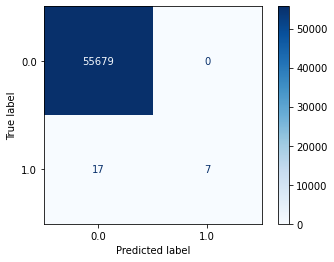

In [ ]:
plot_confusion_matrix(rgl,x_test,y_test, cmap='Blues')

#Modelos Engajado

###Treinamento Teste

In [ ]:
from sklearn.model_selection import train_test_split

cols = ['vlr_saldo','vlr_credito', 'num_produtos', 'qtd_oper']

# Dividindo x e y
x = client[cols]
y = client['ind_engaj']

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

###Árvore de decisão

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

avd = DecisionTreeClassifier(criterion='entropy', random_state=42)
avd.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred_avd = avd.predict(x_test)
y_pred_avd

array([0., 0., 0., ..., 1., 0., 1.])

####Métricas

Acurácia

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_avd)

0.7128315605224183

Precisão

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_avd)

0.5773719730051607

Recall

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_avd)

0.5765480060255292

####Matriz de confusão

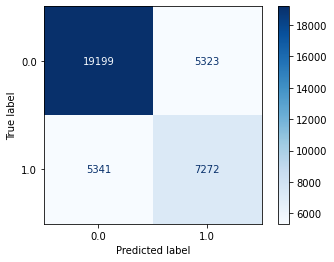

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

rdf = RandomForestClassifier()
rdf.fit(x_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred_rdf = rdf.predict(x_test)

####Métricas

Acurácia

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rdf)

0.7600915578295409

Precisão

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rdf)

0.6619447359216509

Recall

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rdf)

0.6001744232141442

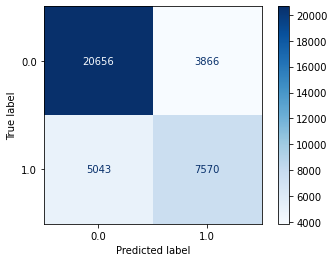

In [ ]:
plot_confusion_matrix(rdf,x_test,y_test, cmap='Blues')